In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv('movies_financial.csv')

In [14]:

df['Budget'] = df['Budget'].replace('[\$,]', '', regex=True).astype(float)
df['Worldwide Gross'] = df['Worldwide Gross'].replace('[\$,]', '', regex=True).astype(float)


In [15]:
analysis_df = df[['Budget', 'Worldwide Gross']]

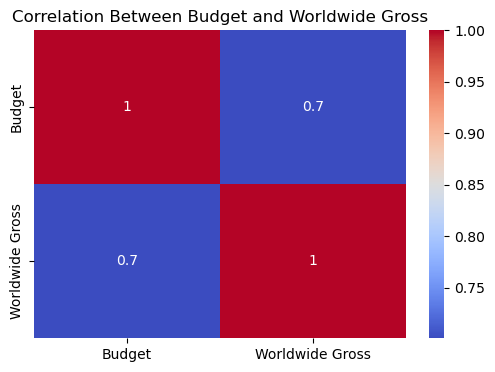

In [16]:
corr = analysis_df.corr()
df['Budget'] = df['Budget'].replace('[\$,]', '', regex=True).astype(float)
df['Worldwide Gross'] = df['Worldwide Gross'].replace('[\$,]', '', regex=True).astype(float)
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Budget and Worldwide Gross')
plt.show()



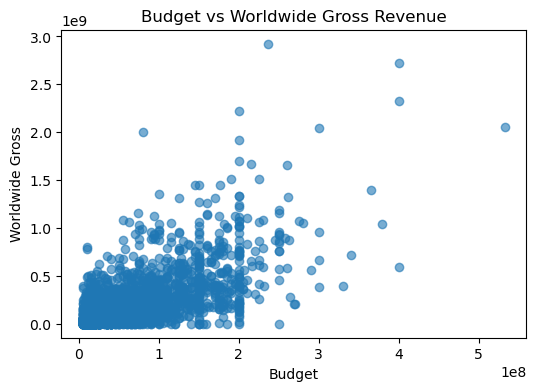

In [17]:
plt.figure(figsize=(6,4))
plt.scatter(df['Budget'], df['Worldwide Gross'], alpha=0.6)
plt.xlabel('Budget')
plt.ylabel('Worldwide Gross')
plt.title('Budget vs Worldwide Gross Revenue')
plt.show()

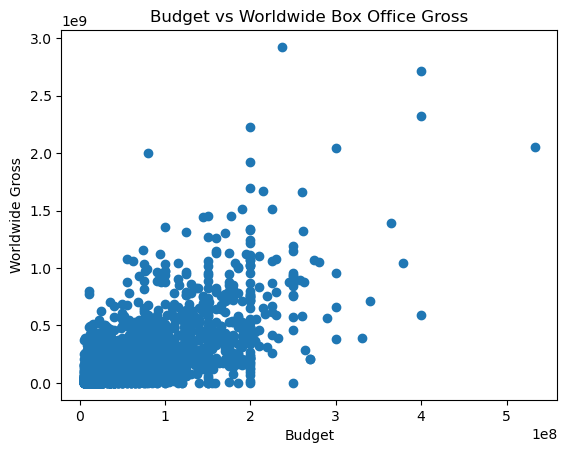

In [19]:
plt.figure()
plt.scatter(df["Budget"], df["Worldwide Gross"])
plt.xlabel("Budget")
plt.ylabel("Worldwide Gross")
plt.title("Budget vs Worldwide Box Office Gross")
plt.show()

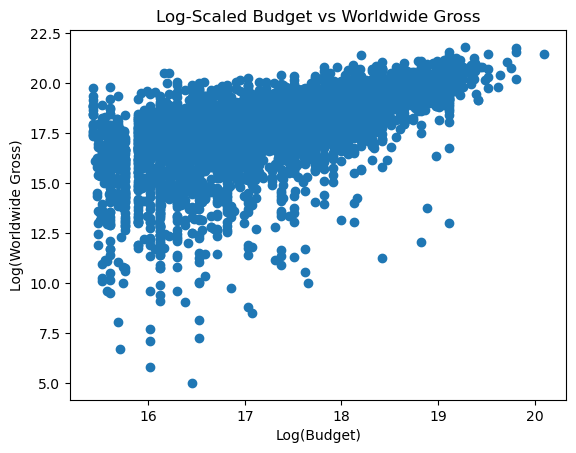

In [23]:
plt.figure()
plt.scatter(
    np.log(df["Budget"]),
    np.log(df["Worldwide Gross"])
)
plt.xlabel("Log(Budget)")
plt.ylabel("Log(Worldwide Gross)")
plt.title("Log-Scaled Budget vs Worldwide Gross")
plt.show()

In [24]:
# Features
X = df["Budget"].values
y = df["Worldwide Gross"].values

# ---- SIMPLE LINEAR REGRESSION ----
# y = m*x + b
m, b = np.polyfit(X, y, 1)

# Predictions
x_line = np.linspace(X.min(), X.max(), 300)
y_line = m * x_line + b

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

Slope (m): 3.091973045275065
Intercept (b): -11513999.252892038


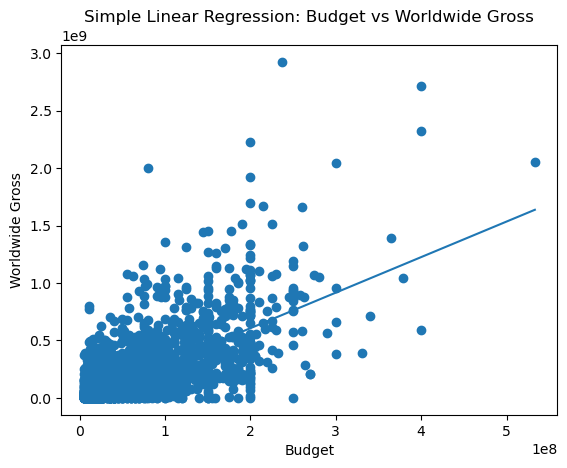

In [25]:
#PLOT 
plt.figure()
plt.scatter(X, y)
plt.plot(x_line, y_line)
plt.xlabel("Budget")
plt.ylabel("Worldwide Gross")
plt.title("Simple Linear Regression: Budget vs Worldwide Gross")
plt.show()

In [26]:
test_budgets = np.array([
    10_000_000,
    30_000_000,
    50_000_000,
    100_000_000,
    200_000_000
])

# Predictions
predicted_gross = m * test_budgets + b

# Show results
for budget, gross in zip(test_budgets, predicted_gross):
    print(f"Budget: ${budget:,.0f} → Predicted Gross: ${gross:,.0f}")

Budget: $10,000,000 → Predicted Gross: $19,405,731
Budget: $30,000,000 → Predicted Gross: $81,245,192
Budget: $50,000,000 → Predicted Gross: $143,084,653
Budget: $100,000,000 → Predicted Gross: $297,683,305
Budget: $200,000,000 → Predicted Gross: $606,880,610


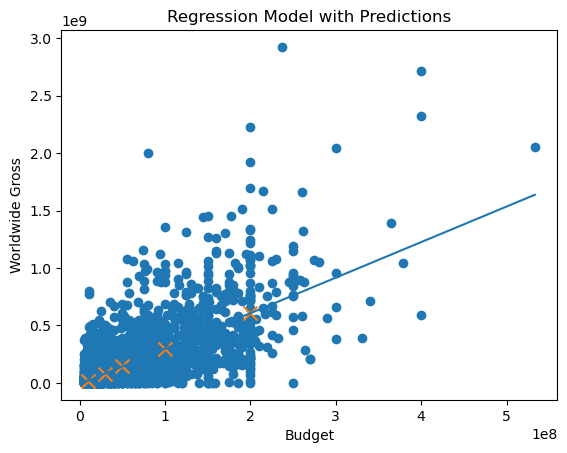

In [27]:
# Regression line
x_line = np.linspace(X.min(), X.max(), 300)
y_line = m * x_line + b

plt.figure()
plt.scatter(X, y)
plt.plot(x_line, y_line)
plt.scatter(test_budgets, predicted_gross, marker='x', s=100)
plt.xlabel("Budget")
plt.ylabel("Worldwide Gross")
plt.title("Regression Model with Predictions")
plt.show()
